In [1]:
import os
from subprocess import call

print("")

print("Downloading...")
if not os.path.exists("UCI HAR Dataset.zip"):
    call(
        'wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip"',
        shell=True
    )
    print("Downloading done.\n")
else:
    print("Dataset already downloaded. Did not download twice.\n")


print("Extracting...")
extract_directory = os.path.abspath("UCI HAR Dataset")
if not os.path.exists(extract_directory):
    call(
        'unzip -nq "UCI HAR Dataset.zip"',
        shell=True
    )
    print("Extracting successfully done to {}.".format(extract_directory))
else:
    print("Dataset already extracted. Did not extract twice.\n")


Downloading...

Extracting...
Dataset already extracted. Did not extract twice.



In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics

import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING", 
    "WALKING_UPSTAIRS", 
    "WALKING_DOWNSTAIRS", 
    "SITTING", 
    "STANDING", 
    "LAYING"
]

In [4]:
'''
!pwd && ls
os.chdir(DATA_PATH)
!pwd && ls

!python download_dataset.py

!pwd && ls
os.chdir("..")
!pwd && ls

DATASET_PATH = DATA_PATH + "UCI HAR Dataset/"
'''

'\n!pwd && ls\nos.chdir(DATA_PATH)\n!pwd && ls\n\n!python download_dataset.py\n\n!pwd && ls\nos.chdir("..")\n!pwd && ls\n\nDATASET_PATH = DATA_PATH + "UCI HAR Dataset/"\n'

In [5]:
DATASET_PATH = "/Users/hormone03/Desktop/Human_Act_Detection/UCI HAR Dataset/"


In [12]:
delta_MFCC = np.zeros(X_train.shape)
for t in range(delta_MFCC.shape[1]):
		index_t_minus_one,index_t_plus_one=t-1,t+1
		
		if index_t_minus_one<0:    
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		
		delta_MFCC[:,t]=0.5*(X_train[:,index_t_plus_one]-X_train[:,index_t_minus_one] )

In [13]:
double_delta_MFCC = np.zeros(X_train.shape)
for t in range(double_delta_MFCC.shape[1]):
		
		index_t_minus_one,index_t_plus_one, index_t_plus_two,index_t_minus_two=t-1,t+1,t+2,t-2
		
		if index_t_minus_one<0:
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		if index_t_minus_two<0:
			index_t_minus_two=0
		if index_t_plus_two>=delta_MFCC.shape[1]:
			index_t_plus_two=delta_MFCC.shape[1]-1
		  
		double_delta_MFCC[:,t]=0.1*( 2*X_train[:,index_t_plus_two]+X_train[:,index_t_plus_one]-X_train[:,index_t_minus_one]-2*X_train[:,index_t_minus_two] )
x_train = np.concatenate((X_train,delta_MFCC,double_delta_MFCC),axis=1)

In [14]:
delta_MFCC = np.zeros(X_test.shape)
for t in range(delta_MFCC.shape[1]):
		index_t_minus_one,index_t_plus_one=t-1,t+1
		
		if index_t_minus_one<0:    
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		
		delta_MFCC[:,t]=0.5*(X_test[:,index_t_plus_one]-X_test[:,index_t_minus_one] )

In [15]:
double_delta_MFCC = np.zeros(X_test.shape)
for t in range(double_delta_MFCC.shape[1]):
		
		index_t_minus_one,index_t_plus_one, index_t_plus_two,index_t_minus_two=t-1,t+1,t+2,t-2
		
		if index_t_minus_one<0:
			index_t_minus_one=0
		if index_t_plus_one>=delta_MFCC.shape[1]:
			index_t_plus_one=delta_MFCC.shape[1]-1
		if index_t_minus_two<0:
			index_t_minus_two=0
		if index_t_plus_two>=delta_MFCC.shape[1]:
			index_t_plus_two=delta_MFCC.shape[1]-1
		  
		double_delta_MFCC[:,t]=0.1*( 2*X_test[:,index_t_plus_two]+X_test[:,index_t_plus_one]-X_test[:,index_t_minus_one]-2*X_test[:,index_t_minus_two] )
x_test = np.concatenate((X_test,delta_MFCC,double_delta_MFCC),axis=1)



In [16]:
# Input Data 

training_data_count = len(X_train)  
test_data_count = len(X_test)  
n_steps = len(X_train[0])  
n_input = len(X_train[0][0])  



n_hidden = 32 
n_classes = 6 


# Training 

learning_rate = 0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
batch_size = 1500
display_iter = 30000  # To show test set accuracy during training




Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) 0.09913992 0.39567086
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [17]:
def LSTM_RNN(_X, _weights, _biases):
   
    _X = tf.transpose(_X, [1, 0, 2])  
    _X = tf.reshape(_X, [-1, n_input]) 
    
    
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)

    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    #
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


In [18]:
def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s


In [19]:
def one_hot(y_, n_classes=n_classes):
    # Function to encode neural one-hot output labels from number indexes 
    # e.g.: 
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns FLOATS

In [20]:
# Graph input/output
tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [21]:
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))

    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))

Training iter #1500:   Batch Loss = 3.056197, Accuracy = 0.15733332931995392
PERFORMANCE ON TEST SET: Batch Loss = 2.7891061305999756, Accuracy = 0.2395656555891037
Training iter #30000:   Batch Loss = 1.291464, Accuracy = 0.6859999895095825
PERFORMANCE ON TEST SET: Batch Loss = 1.3780755996704102, Accuracy = 0.6304716467857361
Training iter #60000:   Batch Loss = 1.216979, Accuracy = 0.7126666903495789
PERFORMANCE ON TEST SET: Batch Loss = 1.29523503780365, Accuracy = 0.7027485370635986
Training iter #90000:   Batch Loss = 1.101676, Accuracy = 0.7853333353996277
PERFORMANCE ON TEST SET: Batch Loss = 1.1875481605529785, Accuracy = 0.758059024810791
Training iter #120000:   Batch Loss = 0.924552, Accuracy = 0.8679999709129333
PERFORMANCE ON TEST SET: Batch Loss = 1.3076460361480713, Accuracy = 0.7207329273223877
Training iter #150000:   Batch Loss = 0.784324, Accuracy = 0.9106666445732117
PERFORMANCE ON TEST SET: Batch Loss = 1.0221400260925293, Accuracy = 0.8252460360527039
Training it

PERFORMANCE ON TEST SET: Batch Loss = 0.6063714027404785, Accuracy = 0.8995589017868042
Training iter #1500000:   Batch Loss = 0.384763, Accuracy = 0.940666675567627
PERFORMANCE ON TEST SET: Batch Loss = 0.6039788126945496, Accuracy = 0.9073634147644043
Training iter #1530000:   Batch Loss = 0.293974, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 0.5619267225265503, Accuracy = 0.9107567071914673
Training iter #1560000:   Batch Loss = 0.306472, Accuracy = 0.9580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 0.5947463512420654, Accuracy = 0.9073634147644043
Training iter #1590000:   Batch Loss = 0.315998, Accuracy = 0.9426666498184204
PERFORMANCE ON TEST SET: Batch Loss = 0.6023749113082886, Accuracy = 0.9005768299102783
Training iter #1620000:   Batch Loss = 0.300644, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 0.5823668837547302, Accuracy = 0.9127926826477051
Training iter #1650000:   Batch Loss = 0.335044, Accuracy = 0.9520000219345093

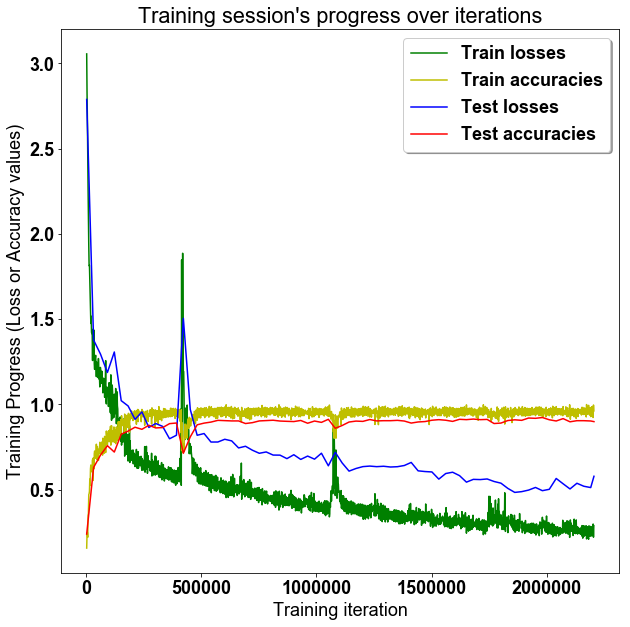

In [22]:
# (Inline plots: )
#%matplotlib inline

font = {
    'family' : 'Arial',
    'weight' : 'bold',
    'size'   : 18
}
matplotlib.rc('font', **font)

width = 10
height = 10
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "g-", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "y-", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "r-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

Testing Accuracy: 89.92195725440979%

Precision: 90.23187222816509%
Recall: 89.92195453003053%
f1_score: 89.9027813041992%

Confusion Matrix:
[[459   1  36   0   0   0]
 [  1 429  41   0   0   0]
 [  0   0 420   0   0   0]
 [  3  18   7 376  87   0]
 [  3   6   0  67 456   0]
 [  0  27   0   0   0 510]]

Confusion matrix (normalised to % of total test data):
[[62.300648    0.13573125  4.886325    0.          0.          0.        ]
 [ 0.13573125 58.228706    5.5649815   0.          0.          0.        ]
 [ 0.          0.         57.00713     0.          0.          0.        ]
 [ 0.40719375  2.4431624   0.9501188  51.03495    11.808619    0.        ]
 [ 0.40719375  0.8143875   0.          9.093994   61.89345     0.        ]
 [ 0.          3.664744    0.          0.          0.         69.22294   ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


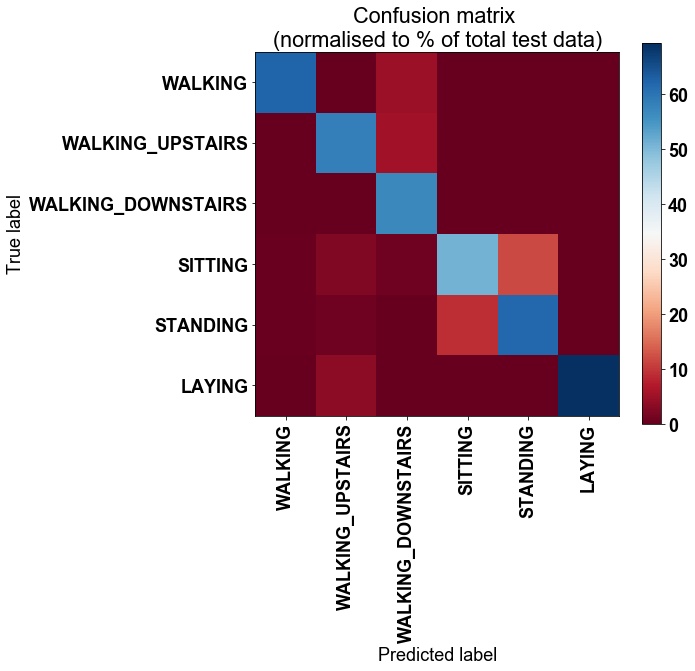

In [23]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*400

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 10
height = 9
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    #cmap=plt.cm.rainbow
    cmap='RdBu'
    #cmap=plt.cm.Wistia
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
sess.close()